In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
new_df= pd.read_csv("../data/new_df")

In [4]:
new_df.head()

,Unnamed: 0,patient_id,age,num_visits,avg_time_between_visits,avg_a1c,avg_control_level,num_obs
0,0,72,56,10,99.777778,7.833333,1,6
1,1,254,64,54,20.584906,8.842857,0,7
2,2,255,64,8,146.857143,10.233333,0,2
3,3,304,70,5,54.500000,7.000000,1,1
4,4,384,66,9,105.250000,8.500000,0,4


In [5]:
new_df.drop(columns=["Unnamed: 0"],inplace=True)

In [6]:
new_df.dtypes

patient_id                   int64
age                          int64
num_visits                   int64
avg_time_between_visits    float64
avg_a1c                    float64
avg_control_level            int64
num_obs                      int64
dtype: object

In [7]:
new_df.head()

,patient_id,age,num_visits,avg_time_between_visits,avg_a1c,avg_control_level,num_obs
0,72,56,10,99.777778,7.833333,1,6
1,254,64,54,20.584906,8.842857,0,7
2,255,64,8,146.857143,10.233333,0,2
3,304,70,5,54.500000,7.000000,1,1
4,384,66,9,105.250000,8.500000,0,4


# Scatter Plots

Here I have plotted number of visits to average a1c. Most of our data points are clustered to the bottom left hand side with a few outliers. 

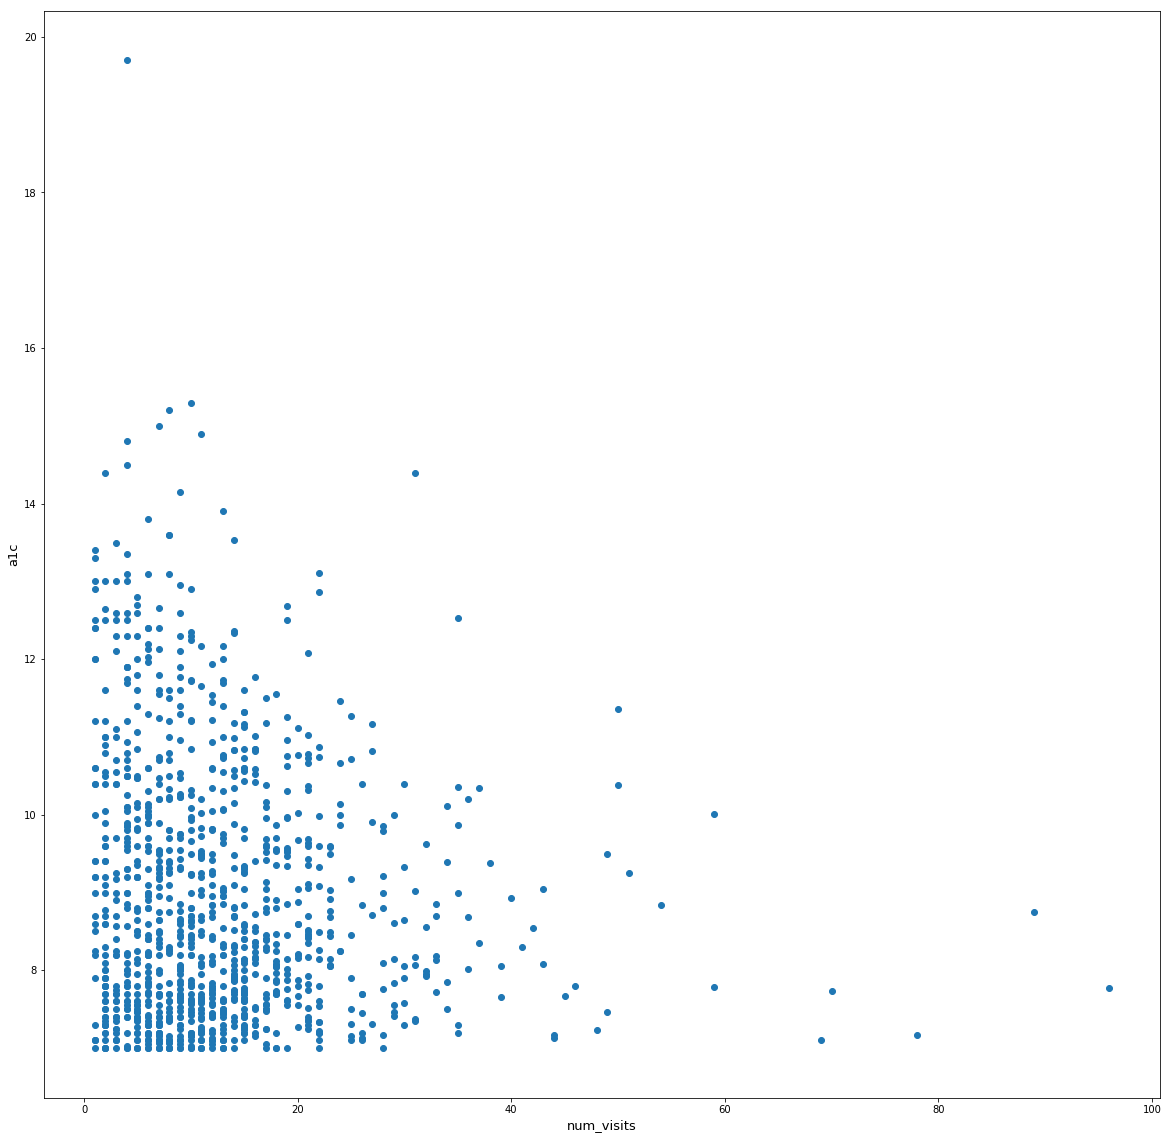

In [8]:
fig,ax=plt.subplots(figsize=(20,20))
ax.scatter(x=new_df["num_visits"], y=new_df["avg_a1c"])
plt.ylabel('a1c', fontsize=13)
plt.xlabel('num_visits', fontsize=13)
plt.show()

Average time between visits and average a1c seems to follow a similar pattern

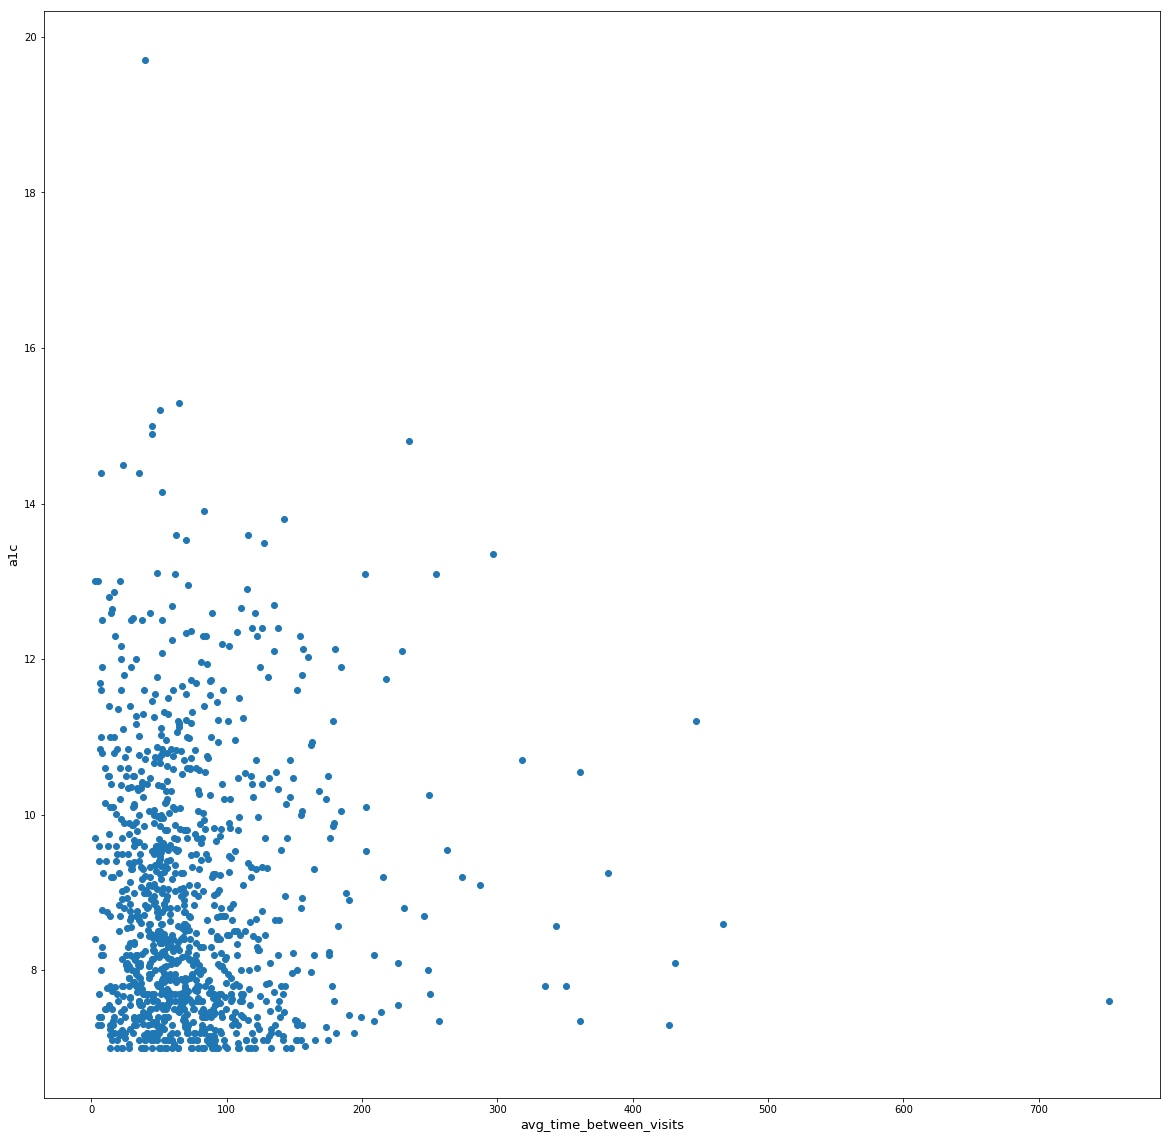

In [9]:
fig,ax=plt.subplots(figsize=(20,20))
ax.scatter(x=new_df["avg_time_between_visits"], y=new_df["avg_a1c"])
plt.ylabel('a1c', fontsize=13)
plt.xlabel('avg_time_between_visits', fontsize=13)
plt.show()

# Bar Plots

Plotting average control level (0 or 1) against number of visits: there doesn't seem to be a significant difference between number of visits and control level. 

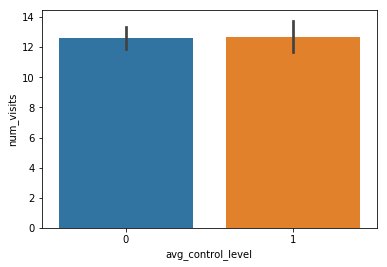

In [10]:
sns.barplot(x=new_df["avg_control_level"],y=new_df['num_visits'])

There is a slight difference between average time between visits and control level; there are a few more people in a controlled state the greater the average time between visits. 

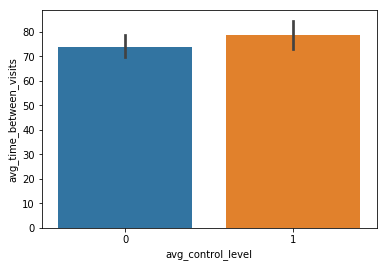

In [11]:
sns.barplot(x=new_df["avg_control_level"],y=new_df['avg_time_between_visits'])

# Heatmap 

Although heatmaps shouldn't usually be used with data concerning health, I was curious to see if there would be any type of correlation with a1c. The below chart doesn't show that there is.

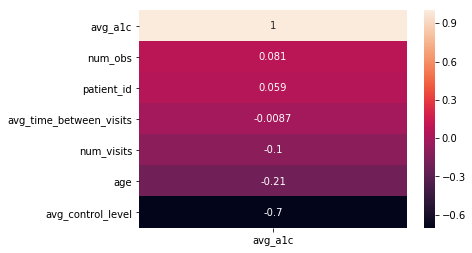

In [15]:
 sns.heatmap(new_df.corr()[["avg_a1c"]].sort_values(by="avg_a1c",ascending=False), annot=True)

# Histograms

Does our data follow a normal distribtution? 

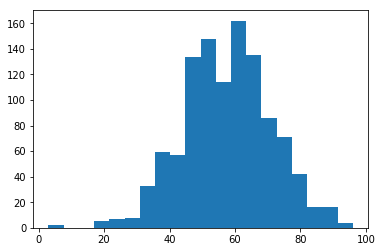

In [27]:
plt.hist(new_df["age"], bins=20);

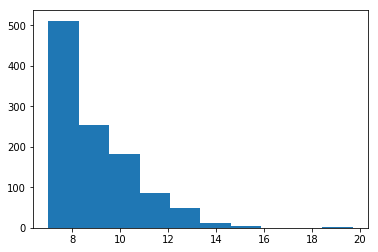

In [30]:
plt.hist(new_df["avg_a1c"], bins=10);
#follows a right skewed distribution 
#mean is greater than the median

(array([552., 357., 126.,  39.,  12.,   6.,   2.,   2.,   1.,   2.]),
 array([ 1. , 10.5, 20. , 29.5, 39. , 48.5, 58. , 67.5, 77. , 86.5, 96. ]),
 <a list of 10 Patch objects>)

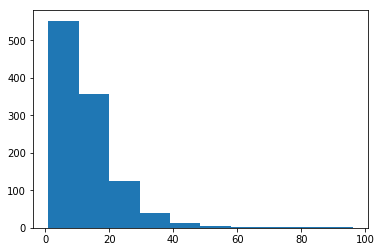

In [33]:
plt.hist(new_df["num_visits"])

# Clustering

Clustering to see if we can find any patterns in our data

In [38]:
cluster_data = new_df[["avg_a1c", "avg_time_between_visits"]]
cluster_data.head()

avg_a1c                     0
avg_time_between_visits    31
dtype: int64

In [39]:
cluster_data.dropna(inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
cluster_data.head()

,avg_a1c,avg_time_between_visits
0,7.833333,99.777778
1,8.842857,20.584906
2,10.233333,146.857143
3,7.000000,54.500000
4,8.500000,105.250000


In [55]:
km = KMeans(n_clusters=10)
km.fit(cluster_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
km.labels_

array([5, 4, 3, ..., 4, 4, 4], dtype=int32)

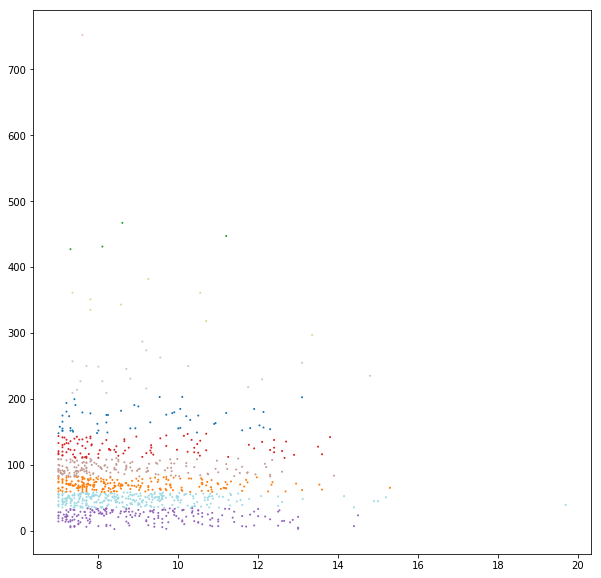

In [57]:
plt.figure(figsize=(10, 10))
plt.scatter(cluster_data.avg_a1c, cluster_data.avg_time_between_visits, c=km.labels_, s=1, cmap="tab20");

Clustering by average time between visits: we see there is a pattern in how much time patients take to come back for a visit, but this doesn't show a difference in their a1c levels. 

In [58]:
cluster_data = new_df[["avg_a1c", "num_visits"]]
cluster_data.head()

,avg_a1c,num_visits
0,7.833333,10
1,8.842857,54
2,10.233333,8
3,7.000000,5
4,8.500000,9


In [59]:
km = KMeans(n_clusters=10)
km.fit(cluster_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

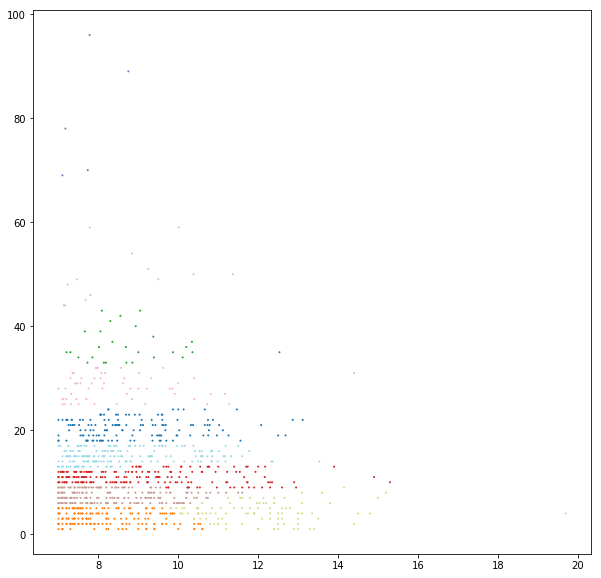

In [61]:
plt.figure(figsize=(10, 10))
plt.scatter(cluster_data.avg_a1c, cluster_data.num_visits, c=km.labels_, s=1, cmap="tab20");

It looks like there is a grouping of people in orange with number of visits at or below 5 and a1c is at or below 10. 